In [1]:
from google.colab import drive
drive.mount('/content/drive')
base_path = "/content/drive/Shareddrives/ECE 4580 Final Project/Colab/"

Mounted at /content/drive


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.regularizers import l2
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint, EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [3]:
'''
Read in the csv data from the fer2013 dataset and load it into a pandas dataframe
'''
EMOTIONS = {
    0:"angry",
    1:"disgust",
    2:"fear",
    3:"happy",
    4:"sad",
    5:"surprise",
    6:"neutral"
}

train_dir = base_path+"data/train.csv"

df = pd.read_csv(train_dir)

# convert pixel strings into 2d numpy arrays
#faces = df['pixels'].apply(string_to_image)

pixels = df['pixels'].tolist()
faces = []
for sequence in pixels:
    face = [int(pixel) for pixel in sequence.split()]
    face = np.asarray(face).reshape(48, 48)
    face = cv2.resize(face.astype('uint8'), (48, 48))
    faces.append(face.astype('float32'))


#expand the channel dimension of each image
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)

#convert labels to categorical matrix
emotions = pd.get_dummies(df['emotion']).values

# get train-test split
x_train, x_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.1, random_state=42)

# split training once more into validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=69)

In [8]:
def predict_image(input_image):
    expanded_image = np.expand_dims(input_image, 0)
    expanded_image = np.expand_dims(expanded_image, -1)
    results = model.predict(expanded_image)[0]
    return list(results).index(max(results))

model = keras.models.load_model(base_path+"/vt-moji-0")



In [10]:
predicted_emotions = []
for test in x_test:
  prediction = predict_image(test)
  predicted_emotions.append(prediction)

true_emotions = []
for vector in y_test:
  true_emotions.append(np.argmax(vector))


ValueError: ignored

[[0.52417303 0.0178117  0.14249364 0.07888041 0.11704835 0.00508906
  0.11450382]
 [0.16666667 0.63888889 0.16666667 0.         0.         0.
  0.02777778]
 [0.12439024 0.00487805 0.50487805 0.05365854 0.15853659 0.06585366
  0.08780488]
 [0.02439024 0.         0.01626016 0.88617886 0.02439024 0.01490515
  0.03387534]
 [0.12396694 0.00413223 0.15082645 0.04545455 0.49173554 0.01239669
  0.1714876 ]
 [0.04049844 0.         0.11838006 0.04361371 0.02492212 0.73208723
  0.04049844]
 [0.07361963 0.00204499 0.06134969 0.09815951 0.14519427 0.00817996
  0.61145194]]


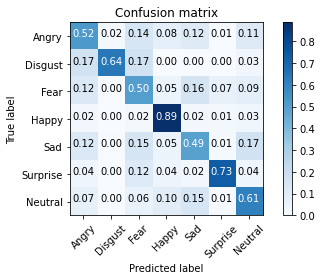

In [21]:
# the general framework for generating this confusion matrix can be found at https://github.com/gitshanks/fer2013

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_emotions, predicted_emotions, normalize='true')

labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

import itertools
import matplotlib.pyplot as plt

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"%.02f" % cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()